<a href="https://colab.research.google.com/github/ceyhun2306/Data-Analysis/blob/main/data_analysing/coffee_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
#!/bin/bash
!kaggle datasets download navjotkaushal/coffee-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset
License(s): CC-BY-SA-4.0
  0% 0.00/38.1k [00:00<?, ?B/s]
100% 38.1k/38.1k [00:00<00:00, 122MB/s]


In [9]:
!unzip/content/coffee-sales-dataset.zip

/bin/bash: line 1: unzip/content/coffee-sales-dataset.zip: No such file or directory


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("/content/coffee-sales-dataset.zip")
df

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


In [12]:
df.shape

(3547, 11)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [14]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [15]:
df.isna().sum()

,0
hour_of_day,0
cash_type,0
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0
Weekdaysort,0
Monthsort,0
Date,0


In [16]:
df.head(10)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
5,15,card,33.8,Americano with Milk,Afternoon,Fri,Mar,5,3,2024-03-01,15:39:47.726000
6,16,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,16:19:02.756000
7,18,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,18:39:03.580000
8,19,card,38.7,Cocoa,Night,Fri,Mar,5,3,2024-03-01,19:22:01.762000
9,19,card,33.8,Americano with Milk,Night,Fri,Mar,5,3,2024-03-01,19:23:15.887000


In [17]:
df["cash_type"].value_counts()

,count
cash_type,
card,3547


### There is only one payment type and it is card

In [18]:
del df['Time']

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

dtype('<M8[ns]')

In [20]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Year,Month,Day
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,2024,3,1
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2024,3,1
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,2024,3,1
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,2024,3,1
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,2024,3,1


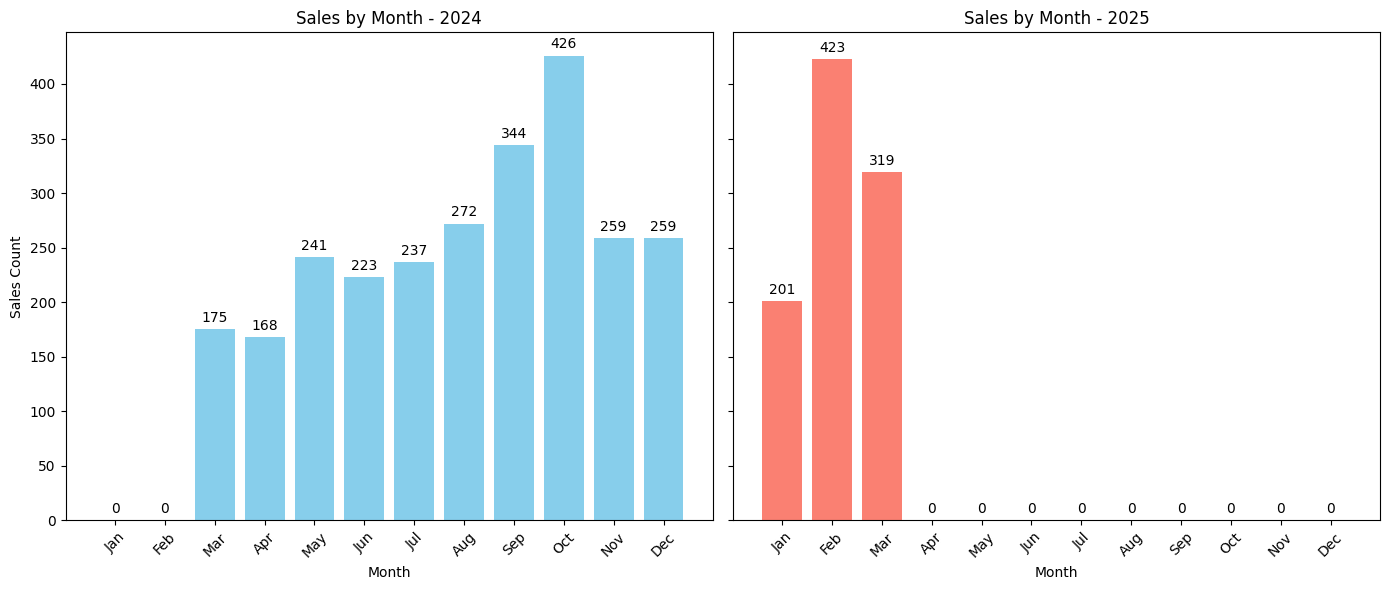

In [22]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Convert to categorical with correct order
df['Month_name'] = pd.Categorical(df['Month_name'], categories=month_order, ordered=True)

# Get sales counts per month
sales_by_month_2024 = df[df['Year'] == 2024]['Month_name'].value_counts().sort_index()
sales_by_month_2025 = df[df['Year'] == 2025]['Month_name'].value_counts().sort_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# 2024 sales
bars1 = axes[0].bar(sales_by_month_2024.index, sales_by_month_2024.values, color='skyblue')
axes[0].set_title("Sales by Month - 2024")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Sales Count")
axes[0].tick_params(axis='x', rotation=45)
axes[0].bar_label(bars1, padding=3)

# 2025 sales
bars2 = axes[1].bar(sales_by_month_2025.index, sales_by_month_2025.values, color='salmon')
axes[1].set_title("Sales by Month - 2025")
axes[1].set_xlabel("Month")
axes[1].tick_params(axis='x', rotation=45)
axes[1].bar_label(bars2, padding=3)

plt.tight_layout()
plt.show()

###The chart suggests that the coffee store started operating in March, which may also mark the beginning of data collection. March and April show similar sales, probably because the store was new and still attracting customers. After these months, sales gradually rose, reaching a peak in October — likely as more people became aware of the store and the weather encouraged coffee consumption.



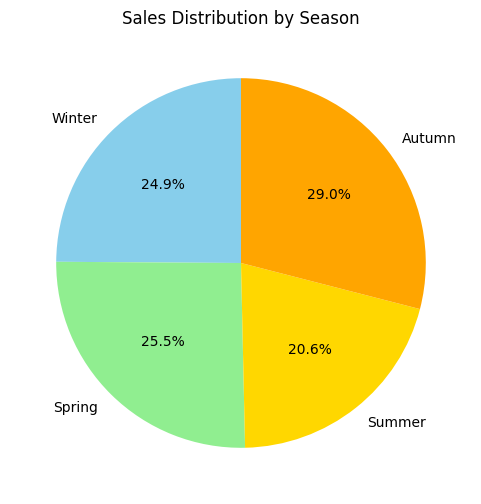

In [23]:
winter = df[(df['Month'] == 12) | (df['Month'] <= 2)]  # Dec, Jan, Feb
spring = df[(df['Month'] >= 3) & (df['Month'] <= 5)]   # Mar, Apr, May
summer = df[(df['Month'] >= 6) & (df['Month'] <= 8)]   # Jun, Jul, Aug
autumn = df[(df['Month'] >= 9) & (df['Month'] <= 11)]  # Sep, Oct, Nov

season_sales = {"Winter": winter.shape[0], "Spring": spring.shape[0], "Summer": summer.shape[0], "Autumn": autumn.shape[0]}

plt.figure(figsize=(6,6))
plt.pie(season_sales.values(), labels=season_sales.keys(), autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','gold','orange'])
plt.title("Sales Distribution by Season")
plt.show()


###We can see that sales peak in Autumn, probably because cooler weather drives people to buy more coffee. Autumn and Spring have average sales, but Summer shows a noticeable dip. It would be useful to investigate why sales are low in Summer and relatively high in Autumn

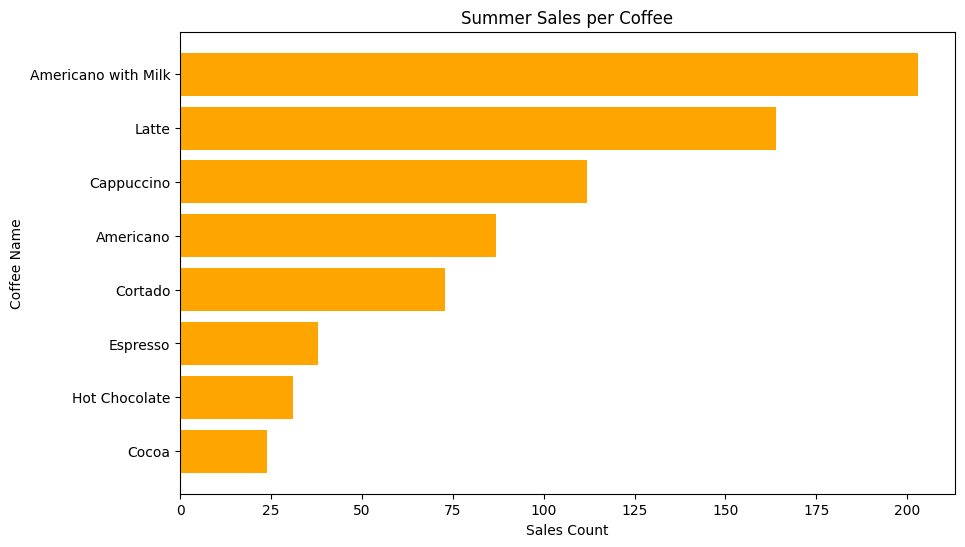

In [24]:
summer_sales = summer['coffee_name'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.barh(summer_sales.index, summer_sales.values, color='orange')
plt.xlabel("Sales Count")
plt.ylabel("Coffee Name")
plt.title("Summer Sales per Coffee")
plt.show()

###In Summer, people mostly order Americano with Milk and Latte, which are more suitable for warm weather. Most other coffee options are hot drinks, so they are less popular during the summer months, leading to slightly lower sales. Overall, the store mainly serves hot coffee drinks.

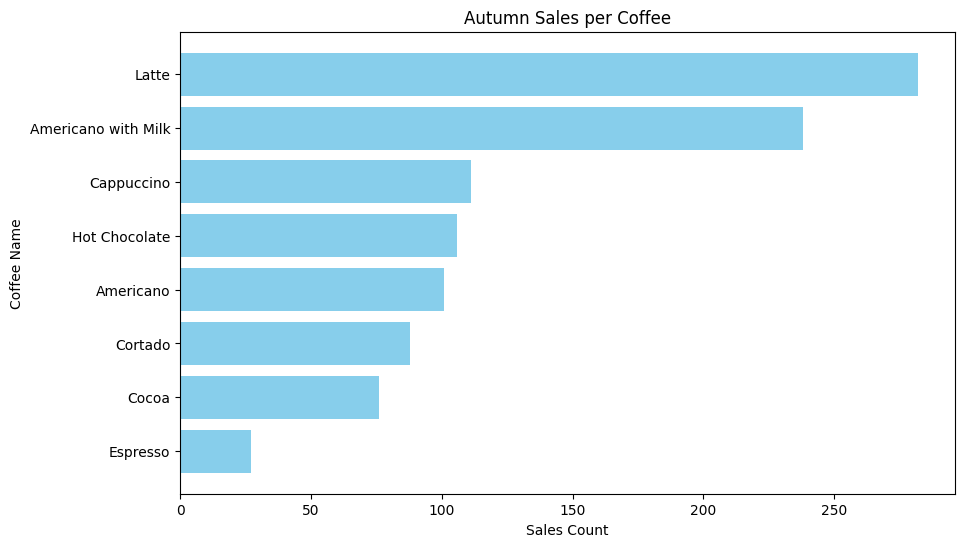

In [25]:
autumn_sales = autumn['coffee_name'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.barh(autumn_sales.index, autumn_sales.values, color='skyblue')
plt.xlabel("Sales Count")
plt.ylabel("Coffee Name")
plt.title("Autumn Sales per Coffee")
plt.show()



###Even in Autumn, people continue to order the drinks that were popular in Summer. The difference is that, as temperatures drop, hot coffee choices become more appealing, boosting sales.

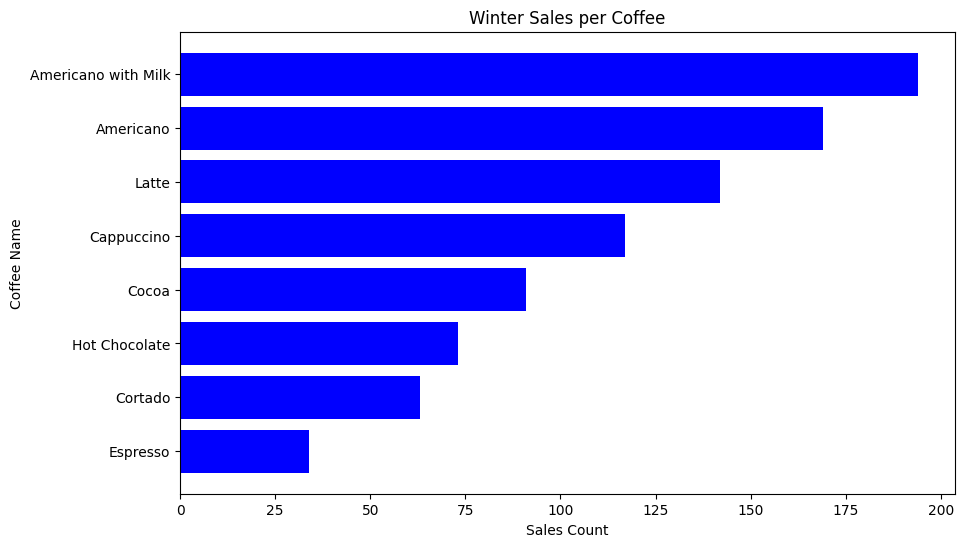

In [26]:
winter_sales = winter['coffee_name'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.barh(winter_sales.index, winter_sales.values, color='blue')
plt.xlabel("Sales Count")
plt.ylabel("Coffee Name")
plt.title("Winter Sales per Coffee")
plt.show()



###Even in Winter, Americano with Milk stays popular. At the same time, hot coffee drinks see increased consumption compared to other seasons, likely due to the colder temperatures.

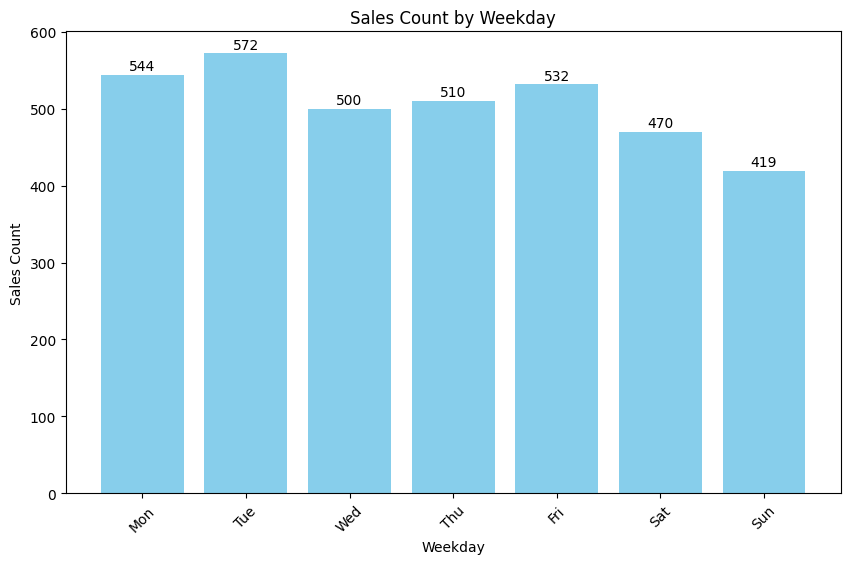

In [27]:
weekday_counts = df['Weekday'].value_counts()

# Define correct weekday order
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Sort counts by the calendar weekday order
weekday_counts = weekday_counts[weekday_counts.index.isin(weekday_order)]
weekday_counts = weekday_counts.reindex(weekday_order)

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(weekday_counts.index, weekday_counts.values, color='skyblue')

# Add counts above bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, str(int(height)),
             ha='center', va='bottom')

plt.xlabel("Weekday")
plt.ylabel("Sales Count")
plt.title("Sales Count by Weekday")
plt.xticks(rotation=45)
plt.show()

###Coffee sales tend to be higher during workdays than on weekends, probably because people buy coffee while going to work or during office hours.

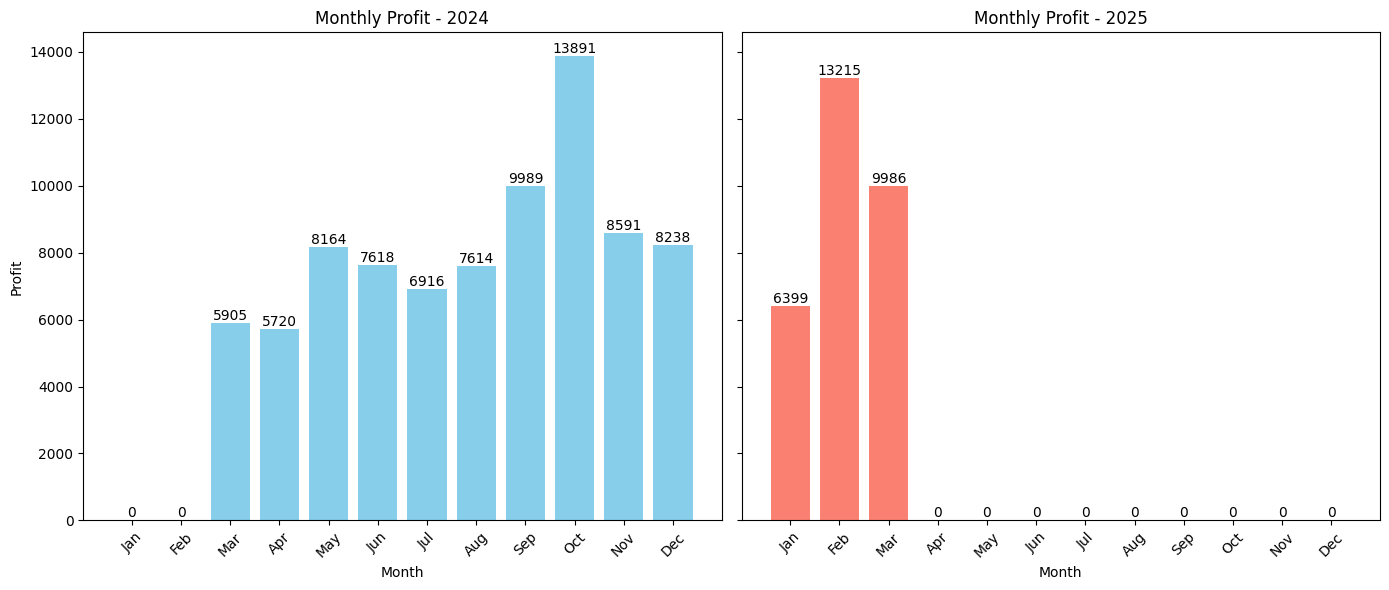

In [28]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

profit_by_month_2024 = {}
profit_by_month_2025 = {}

for month in month_order:
    profit_by_month_2024[month] = df[(df['Year'] == 2024) & (df['Month_name'] == month)]['money'].sum()
    profit_by_month_2025[month] = df[(df['Year'] == 2025) & (df['Month_name'] == month)]['money'].sum()

profits_2024 = [profit_by_month_2024[m] for m in month_order]
profits_2025 = [profit_by_month_2025[m] for m in month_order]

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# 2024
bars1 = axes[0].bar(month_order, profits_2024, color='skyblue')
axes[0].set_title("Monthly Profit - 2024")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Profit")
axes[0].tick_params(axis='x', rotation=45)
axes[0].bar_label(bars1, fmt='%.f')

# 2025
bars2 = axes[1].bar(month_order, profits_2025, color='salmon')
axes[1].set_title("Monthly Profit - 2025")
axes[1].set_xlabel("Month")
axes[1].tick_params(axis='x', rotation=45)
axes[1].bar_label(bars2, fmt='%.f')

plt.tight_layout()
plt.show()

###The highest income was recorded in October and February, mainly because the number of coffees sold was higher during these months. Overall, the monthly income is directly proportional to the number of coffees sold. However, despite the small difference between the number of coffees sold in September and October, there is a significant difference in their total income.


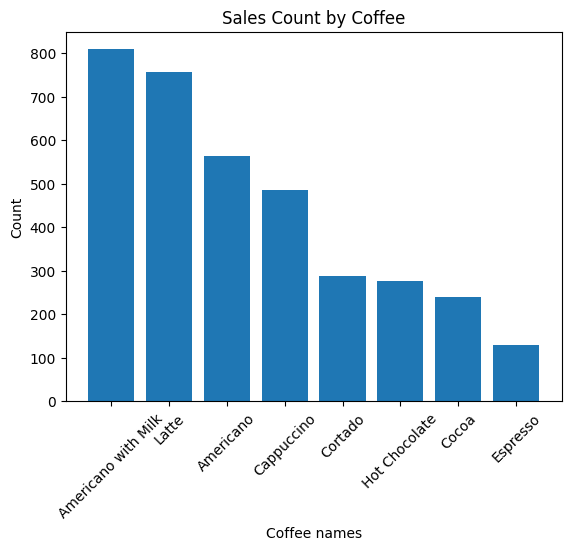

In [30]:
coffee_counts = df['coffee_name'].value_counts()

plt.bar(coffee_counts.index, coffee_counts.values)
plt.xlabel("Coffee names")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Sales Count by Coffee")
plt.show()


###It can be seen that Milk Americano and Latte are among the best-selling coffees. The third most popular is Americano, followed by Cappuccino in fourth place, while the least sold coffee was Espresso.


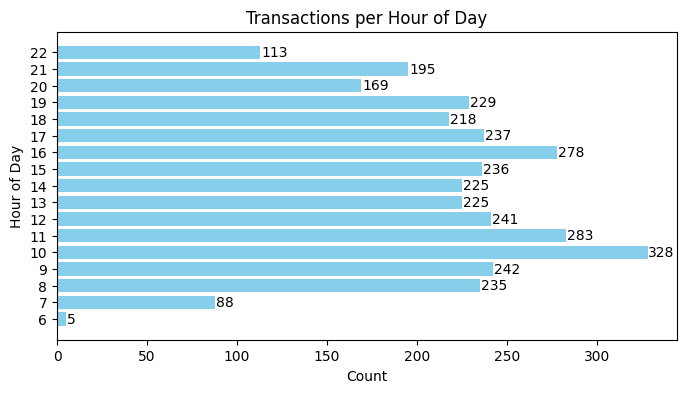

In [31]:
hours = df['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(8,4))
bars = plt.barh(hours.index.astype(str), hours.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)),
             va='center', ha='left')

plt.xlabel("Count")
plt.ylabel("Hour of Day")
plt.title("Transactions per Hour of Day")
plt.show()

###From the visualization, it can be seen that the highest number of transactions occurred at 10 AM, followed by 11 AM and 4 PM. This shows that coffee sales are most active during the late morning and early afternoon hours, likely when people take coffee breaks.

###The lowest number of transactions happened at 6 AM and 7 AM, indicating that coffee demand is very low in the early morning hours. Overall, the number of transactions gradually increases throughout the morning, reaches its peak around 10–11 AM, and then slowly decreases toward the evening

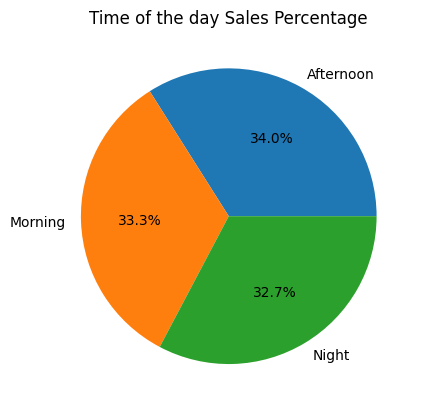

In [32]:
plt.pie(df['Time_of_Day'].value_counts(), labels=df['Time_of_Day'].value_counts().keys(),  autopct='%1.1f%%')
plt.title("Time of the day Sales Percentage")
plt.show()

###It can also be seen that there isn’t a big difference between the hours of the day, but coffee sales are highest during the **afternoon**, followed by the **morning** hours. At **night**, however, the number of coffees sold is noticeably lower compared to other times of the day.


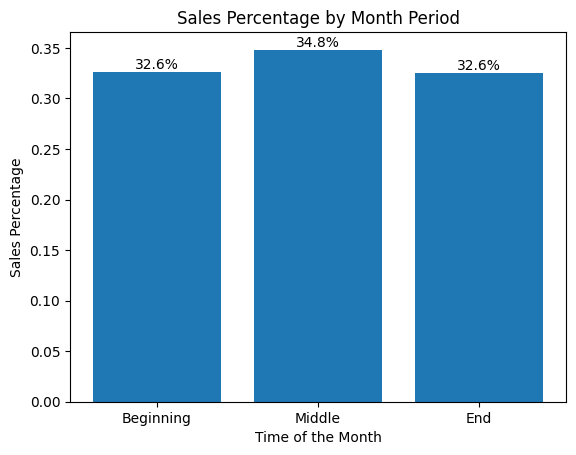

In [33]:

total = df.shape[0]

beginning = df[df['Day'] <= 10].shape[0] / total
middle = df[(df['Day'] > 10) & (df['Day'] <= 20)].shape[0] / total
end = df[df['Day'] > 20].shape[0] / total

time_of_Month = {"Beginning": beginning, "Middle": middle, "End": end}

bars = plt.bar(time_of_Month.keys(), time_of_Month.values())
plt.xlabel("Time of the Month")
plt.ylabel("Sales Percentage")
plt.title("Sales Percentage by Month Period")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height*100:.1f}%",
             ha='center', va='bottom')

plt.show()

###It can be seen that coffee sales are generally higher in the **middle of the month**, specifically between the **10th and 20th days**. However, there is not a significant difference between the **beginning** and **end** of the month — both periods show almost the same level of sales.
